In [1]:
# import libraries required
import pandas as pd
import numpy as np
import seaborn as sns

hdb_resale_prices = pd.read_csv("resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv")

# Background Context

- we are looking at the HDB prices from 2017-present 
- sources :https://www.propertyguru.com.sg/property-guides/mop-flats-affect-hdb-resale-price-38583
https://www.asiaone.com/money/what-cash-over-valuation-hdb-resale-flats-and-how-estimate-it


Reasons why there are increase in prices of resale flats
- enduring buying preference for larger resale flats
- there may be lower demand for reals flat due to completion of more BTO projects and more BTO flats launched quarterly

Possible reasons for higher value in flats in certains areas
- Minimum Occupation period (MOP) in 2023
- Areas covered: Bukit Batok , Yishun , Buangkok and Sembawang


homeowners choose to sell their home as an HDB MOP resale flat:
HDB flats fetch the highest resale value after their 5-year HDB MOP
HDB upgraders want to lock in gains earned on their MOP-ed flats to finance their condo upgrade or move to a larger or more centrally-located HDB flat
Bigger households need a larger space to accommodate their growing families

What is the concept of cash over valuation?
HDB resale prices are negotiated on a “willing buyer, willing seller” basis. HDB does not step in to set prices or stop sellers from overcharging. 

Let’s say you’ve found the flat of your dreams in Yishun. The seller quotes you $600,000, and you’re pleased with the price.

After you pay $1,000 for the Option to Purchase (OTP) and request the valuation report from HDB, it turns out that HDB values your dream home at $550,000. Your COV is thus $600,000 – $550,000 = $50,000

You’ll have to pay the $50,000 COV in cash — and that’s on top of your down payment.

Otherwise, you can back out of the deal and resume your HDB hunt. But you’ll forfeit the $1,000 option fee.

What is cash over valuation?
COV must only be paid in cash — without the help of CPF, grants and a home loan.

Buying a resale flat doesn’t necessarily result in COV. You could also negotiate a selling price that will end up as Cash At Valuation, where the price you’ve settled with the owner and the HDB valuation price turns out to be on par. Alternatively, it could also result in a Cash Under Valuation which — no surprise here — means that the flat is sold at a price that’s below its official value. 

What are factors that affect the cash over valuation?
1. Location
2. Flat Size, Age, Floor
3. Mature Estate
4. Exceptional Features
5. Lack of Supply





# Problem Statement
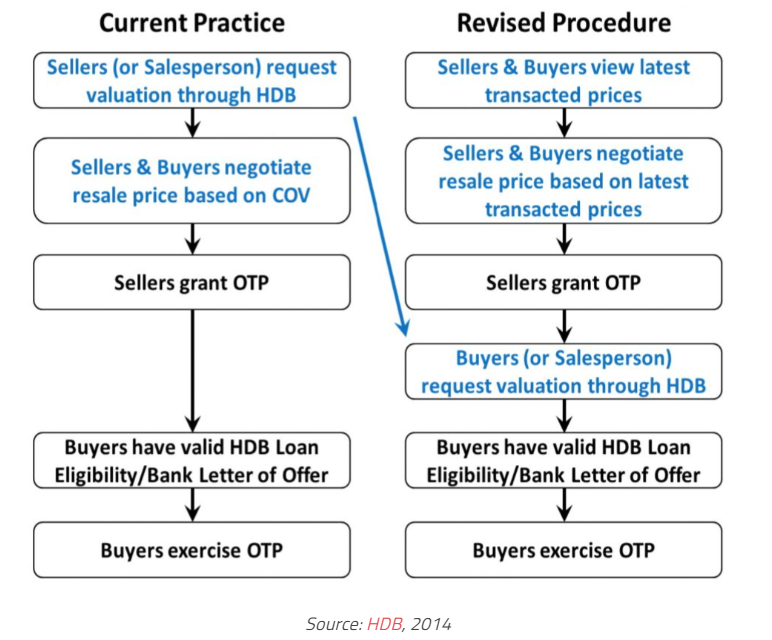

Since 2014, HDB has required buyers and sellers to first agree on the resale price, without the official valuation. The valuation is obtained after that for the purpose of determining the amount of loan and CPF savings that can be used for the flat purchase. This and other property cooling measures in 2013 managed to bring down the prices of the overall resale market and COVs


As the valuation is only obtained after the price is agreed, a buyer can run into a situation where you have to fork out extra cash to complete the purchase or forfeit your option. For example, you and your seller agree on $500,000 for the purchase price and you pay the option fee of $1,000 to secure the Option To Purchase (OTP). You then proceed to obtain a valuation from HDB. However, HDB’s valuation is only $480,000. This means you are short of $20,000. The amount you can borrow also reduces because the bank will loan you a lower amount based on the lower valuation due to the loan-to-valuation (LTV) limit. For some buyers, this may be a dealbreaker as they simply do not have the cash to complete the transaction, and thus have to forfeit their option.


https://www.asiaone.com/money/hdb-valuation-how-do-i-figure-out-how-much-hdb-flat-worth


# Approach
Firstly, we have to take the HDB Resale Median price --- meaning half of the flats were purchased at amounts above the median price and half of the flats were purchased at the amounts below the median

1) Condition of Flat
A well-maintained HDB flat with tasteful renovations and furnishing will always sell for a higher price.

Pay attention to what the exterior of the HDB flat and entire block looks like too as that will also affect prices.

2) Lease of Flat
Unless you’re buying a brand new BTO, any HDB flat that you get off the market will come with a lease that is less than the standard 99-years.

For obvious reasons , the longer the remaining lease left on the HDB flat, the more valuable it will be.

FYI: the remaining lease will determine how much HDB grants or how much of your CPF you can use to fund the purchase

Just look at resale units at Simei Street 1.

The one with 75 years left on the remaining lease is worth way more than the one with 66 years and 11 months left.

3) Location of Flat
Units on a higher floor generally command a premium.

Note: it’s the same with BTOs, every floor you go up, it’ll cost you a few thousand dollars

Also, if the flat is close to key amenities like:

Shopping malls
Markets
Schools
MRT stations, bus stops, and interchanges
Or maybe it’s close to town or is a mere 2 MRT stops away from the Central Business District.

You can also expect people to pay more for such flats because of their prime location.

4) Size of Flat
The larger the flat, the higher the value.

Even though both Simei Street 1 options as listed above are 4-Room HDB Flats.

You’ll notice that one is a 4-Room Simplified (84 sqm).

# Data preparation


In [2]:
hdb_resale_prices

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0
...,...,...,...,...,...,...,...,...,...,...,...
145618,2023-01,YISHUN,5 ROOM,511B,YISHUN ST 51,07 TO 09,113.0,Improved,2017,93 years 07 months,680000.0
145619,2023-01,YISHUN,5 ROOM,760,YISHUN ST 72,04 TO 06,122.0,Improved,1987,63 years 03 months,548000.0
145620,2023-01,YISHUN,EXECUTIVE,344,YISHUN AVE 11,01 TO 03,145.0,Maisonette,1988,64 years 07 months,755000.0
145621,2023-01,YISHUN,EXECUTIVE,387,YISHUN RING RD,10 TO 12,145.0,Apartment,1988,64 years 06 months,770000.0


In [3]:
# checking if there are any null values
hdb_resale_prices.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
remaining_lease        0
resale_price           0
dtype: int64

In [4]:
# view data type of each column
hdb_resale_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145623 entries, 0 to 145622
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                145623 non-null  object 
 1   town                 145623 non-null  object 
 2   flat_type            145623 non-null  object 
 3   block                145623 non-null  object 
 4   street_name          145623 non-null  object 
 5   storey_range         145623 non-null  object 
 6   floor_area_sqm       145623 non-null  float64
 7   flat_model           145623 non-null  object 
 8   lease_commence_date  145623 non-null  int64  
 9   remaining_lease      145623 non-null  object 
 10  resale_price         145623 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 12.2+ MB


In [5]:
hdb_resale_prices.describe()

,floor_area_sqm,lease_commence_date,resale_price
count,145623.000000,145623.000000,1.456230e+05
mean,97.626416,1995.501672,4.776862e+05
std,24.075982,13.717085,1.653406e+05
min,31.000000,1966.000000,1.400000e+05
25%,82.000000,1985.000000,3.570000e+05
50%,94.000000,1996.000000,4.480000e+05
75%,113.000000,2007.000000,5.650000e+05
max,249.000000,2019.000000,1.418000e+06


# Exploratory Data Analysis

In [6]:
# import libraries required
import matplotlib.pyplot as plt

### Distribution of Resale Prices
<b>Use mean or median resale price?</b><br/>

As seen in the plotted histogram for the resale prices from 2017 to 2023, the resale price data is right skewed. Since the price data does not follow a symmetric distribution, we will use the <i><b>median price</b></i> instead of the mean price to represent the average resale price of the flats.

(array([8.0750e+03, 4.3657e+04, 4.6689e+04, 2.6012e+04, 1.2261e+04,
        6.2540e+03, 2.0360e+03, 4.5800e+02, 1.5700e+02, 2.4000e+01]),
 array([ 140000.,  267800.,  395600.,  523400.,  651200.,  779000.,
         906800., 1034600., 1162400., 1290200., 1418000.]),
 <a list of 10 Patch objects>)

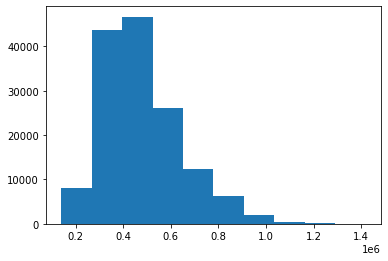

In [7]:
plt.hist(hdb_resale_prices["resale_price"])

# Feature Engineering

Based on the studies and analysis performed by other researchers, the following features that have been concluded to be <b>important</b> in determining the prices of HDB resale flats are as follows: 
- Time Taken to Travel to Central Business District (CBD), Raffles Place
- Number of Years Left on Lease
- Maturity of Estate
<br>

We are also considering <b>other factors</b> that have not been explored by other reseearchers. The factors that we have identified are as follows: 
- Singapore's Inflation Rate
- Flat Model
- Floor Level
- Prices of BTO
- Number of BTO Flats Launched that Year
- Demand Ratio in Resale Flat

Before adding these features into our dataset, we will first perform some data cleaning and feature engineering on the existing features in our dataset.

- convert the flat condition with quantitative measures
- combine the resale prices and the sqm to find the $/sqm (still need to keep sqm to quantify the size!!) 
- remaining lease should be converted to a ratio 
- combine the block and street name to obtain the lat,long - from there we can obtain the distance from amentities, distance from public transport, distance from central
- using the town --- can also do some quantitative measures to quantify how mature the estate is
- average price of the houses of the same category in the area from here we derive the estimated COV
- demand-scarcity ratio --- not sure how to quantify this
- total sale price of the hdb
- there should be a way to convert the storey range to scoring value

### Incorporating Inflation Rate into Resale Prices

In [8]:
# get Singapore's Consumer Price Index (CPI) for all items and housing & utilities from 2017 to 2023
valid_rows = [10,11,14]
cpi_df = pd.read_csv("cpi-2012-to-2022.csv", skiprows=lambda x: x not in valid_rows, index_col=0)

cpi_df = cpi_df.transpose()
cpi_df

,All Items,Housing & Utilities
2022,108.370,106.406
2021,102.119,101.100
2020,99.818,99.714
2019,100.000,100.000
2018,99.438,101.003
2017,99.004,102.372
2016,98.436,105.034
2015,98.963,109.499
2014,99.483,113.517
2013,98.474,113.388


In [9]:
# convert datetime index to year
cpi_df.index = pd.DatetimeIndex(cpi_df.index).year

In [10]:
# add new column to hdb_resale_prices dataframe to store consumer price index for housing and utilities of corresponding year
latest_year = 2022
hdb_resale_prices['cpi_multiplier'] = hdb_resale_prices["month"].apply(lambda x: cpi_df["Housing & Utilities"].loc[min(int(x.split("-")[0]), latest_year)] / 100)

hdb_resale_prices.head()


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,cpi_multiplier
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0,1.02372
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0,1.02372
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0,1.02372
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0,1.02372
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0,1.02372


In [11]:
# add new column to hdb_resale_prices dataframe to store adjusted resale price
hdb_resale_prices['cpi_adjusted_price'] = hdb_resale_prices["resale_price"] * hdb_resale_prices["cpi_multiplier"]

hdb_resale_prices.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,cpi_multiplier,cpi_adjusted_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0,1.02372,237503.04
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0,1.02372,255930.00
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0,1.02372,268214.64
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0,1.02372,271285.80
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0,1.02372,271285.80


In [13]:
hdb_resale_prices['year'] = pd.DatetimeIndex(hdb_resale_prices['month']).year
print(hdb_resale_prices)

          month        town  flat_type block        street_name storey_range  \
0       2017-01  ANG MO KIO     2 ROOM   406  ANG MO KIO AVE 10     10 TO 12   
1       2017-01  ANG MO KIO     3 ROOM   108   ANG MO KIO AVE 4     01 TO 03   
2       2017-01  ANG MO KIO     3 ROOM   602   ANG MO KIO AVE 5     01 TO 03   
3       2017-01  ANG MO KIO     3 ROOM   465  ANG MO KIO AVE 10     04 TO 06   
4       2017-01  ANG MO KIO     3 ROOM   601   ANG MO KIO AVE 5     01 TO 03   
...         ...         ...        ...   ...                ...          ...   
145618  2023-01      YISHUN     5 ROOM  511B       YISHUN ST 51     07 TO 09   
145619  2023-01      YISHUN     5 ROOM   760       YISHUN ST 72     04 TO 06   
145620  2023-01      YISHUN  EXECUTIVE   344      YISHUN AVE 11     01 TO 03   
145621  2023-01      YISHUN  EXECUTIVE   387     YISHUN RING RD     10 TO 12   
145622  2023-01      YISHUN  EXECUTIVE   328     YISHUN RING RD     04 TO 06   

        floor_area_sqm      flat_model 

### No. of BTO per year


In [14]:
# Create the dictionary
dictionary ={2017:14464, 2018 : 17556, 2019 : 12114, 2020 : 7314, 2021: 13756,2022:20064,2023: 20000}
 
# Add a new column named 'Price'
hdb_resale_prices['no.of bto'] = hdb_resale_prices['year'].map(dictionary)
 
# Print the DataFrame"
print(hdb_resale_prices)

          month        town  flat_type block        street_name storey_range  \
0       2017-01  ANG MO KIO     2 ROOM   406  ANG MO KIO AVE 10     10 TO 12   
1       2017-01  ANG MO KIO     3 ROOM   108   ANG MO KIO AVE 4     01 TO 03   
2       2017-01  ANG MO KIO     3 ROOM   602   ANG MO KIO AVE 5     01 TO 03   
3       2017-01  ANG MO KIO     3 ROOM   465  ANG MO KIO AVE 10     04 TO 06   
4       2017-01  ANG MO KIO     3 ROOM   601   ANG MO KIO AVE 5     01 TO 03   
...         ...         ...        ...   ...                ...          ...   
145618  2023-01      YISHUN     5 ROOM  511B       YISHUN ST 51     07 TO 09   
145619  2023-01      YISHUN     5 ROOM   760       YISHUN ST 72     04 TO 06   
145620  2023-01      YISHUN  EXECUTIVE   344      YISHUN AVE 11     01 TO 03   
145621  2023-01      YISHUN  EXECUTIVE   387     YISHUN RING RD     10 TO 12   
145622  2023-01      YISHUN  EXECUTIVE   328     YISHUN RING RD     04 TO 06   

        floor_area_sqm      flat_model 

### Demand for resale


In [15]:
resale_application = {2017:20894,2018:22005,2019:24772,2020:26436,2021:26436,2022:30370}

In [16]:
hdb_resale_prices['resale application'] = hdb_resale_prices['year'].map(resale_application)

In [17]:
hdb_resale_prices

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,cpi_multiplier,cpi_adjusted_price,year,no.of bto,resale application
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0,1.02372,237503.04,2017,14464,20894.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0,1.02372,255930.00,2017,14464,20894.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0,1.02372,268214.64,2017,14464,20894.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0,1.02372,271285.80,2017,14464,20894.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0,1.02372,271285.80,2017,14464,20894.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145618,2023-01,YISHUN,5 ROOM,511B,YISHUN ST 51,07 TO 09,113.0,Improved,2017,93 years 07 months,680000.0,1.06406,723560.80,2023,20000,NaN
145619,2023-01,YISHUN,5 ROOM,760,YISHUN ST 72,04 TO 06,122.0,Improved,1987,63 years 03 months,548000.0,1.06406,583104.88,2023,20000,NaN
145620,2023-01,YISHUN,EXECUTIVE,344,YISHUN AVE 11,01 TO 03,145.0,Maisonette,1988,64 years 07 months,755000.0,1.06406,803365.30,2023,20000,NaN
145621,2023-01,YISHUN,EXECUTIVE,387,YISHUN RING RD,10 TO 12,145.0,Apartment,1988,64 years 06 months,770000.0,1.06406,819326.20,2023,20000,NaN


In [18]:
(hdb_resale_prices['year']==2017).sum()

20509

In [19]:
(hdb_resale_prices['year']==2018).sum()

21561

In [20]:
(hdb_resale_prices['year']==2019).sum()

22186

In [21]:
(hdb_resale_prices['year']==2020).sum()

23333

In [22]:
(hdb_resale_prices['year']==2021).sum()

29087

In [23]:
(hdb_resale_prices['year']==2022).sum()

26740

In [24]:
hdb_resale_prices.loc[hdb_resale_prices['year'] == 2017]['resale application']/(hdb_resale_prices['year']==2017).sum()

0        1.018772
1        1.018772
2        1.018772
3        1.018772
4        1.018772
           ...   
20504    1.018772
20505    1.018772
20506    1.018772
20507    1.018772
20508    1.018772
Name: resale application, Length: 20509, dtype: float64

In [25]:
hdb_resale_prices.loc[hdb_resale_prices['year'] == 2018]['resale application']/(hdb_resale_prices['year']==2018).sum()

20509    1.020593
20510    1.020593
20511    1.020593
20512    1.020593
20513    1.020593
           ...   
42065    1.020593
42066    1.020593
42067    1.020593
42068    1.020593
42069    1.020593
Name: resale application, Length: 21561, dtype: float64

In [26]:
hdb_resale_prices.loc[hdb_resale_prices['year'] == 2019]['resale application']/(hdb_resale_prices['year']==2019).sum()

42070    1.11656
42071    1.11656
42072    1.11656
42073    1.11656
42074    1.11656
          ...   
64251    1.11656
64252    1.11656
64253    1.11656
64254    1.11656
64255    1.11656
Name: resale application, Length: 22186, dtype: float64

In [27]:
hdb_resale_prices.loc[hdb_resale_prices['year'] == 2020]['resale application']/(hdb_resale_prices['year']==2020).sum()

64256    1.132988
64257    1.132988
64258    1.132988
64259    1.132988
64260    1.132988
           ...   
87584    1.132988
87585    1.132988
87586    1.132988
87587    1.132988
87588    1.132988
Name: resale application, Length: 23333, dtype: float64

In [28]:
hdb_resale_prices.loc[hdb_resale_prices['year'] == 2021]['resale application']/(hdb_resale_prices['year']==2021).sum()

87589     0.90886
87590     0.90886
87591     0.90886
87592     0.90886
87593     0.90886
           ...   
116671    0.90886
116672    0.90886
116673    0.90886
116674    0.90886
116675    0.90886
Name: resale application, Length: 29087, dtype: float64

In [29]:
hdb_resale_prices.loc[hdb_resale_prices['year'] == 2022]['resale application']/(hdb_resale_prices['year']==2022).sum()

116676    1.135752
116677    1.135752
116678    1.135752
116679    1.135752
116680    1.135752
            ...   
143411    1.135752
143412    1.135752
143413    1.135752
143414    1.135752
143415    1.135752
Name: resale application, Length: 26740, dtype: float64

In [31]:
demand_ratio = {2017:1.02,2018:1.02,2019:1.12,2020:1.13,2021:0.91,2022:1.14}

In [32]:
hdb_resale_prices['demand ratio'] = hdb_resale_prices['year'].map(demand_ratio)

In [33]:
hdb_resale_prices.to_excel(r'resaleWithDemandAndBtoSupply.xlsx', index=False)